In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/Users/vibhuverma/Desktop/CLASSWORK/BUSINESS PRACTICUM/Anti-Corruption/Feature_ENGG/WBI_country_level_features.csv')
hf = pd.read_csv('/Users/vibhuverma/Desktop/CLASSWORK/BUSINESS PRACTICUM/Anti-Corruption/Final datasets/USAID/combined_usaid_country.csv')

In [3]:
df.head()

,Unnamed: 0,Country Name,Gni Growth (Annual %)_MA(3)_2005-2007,Gni Growth (Annual %)_MA(3)_2008-2010,Gni Growth (Annual %)_MA(3)_2011-2013,Gni Growth (Annual %)_MA(3)_2014-2016,Gni Growth (Annual %)_MA(3)_2017-2019,Claims On Central Government (Annual Growth As % Of Broad Money)_MA(3)_2005-2007,Claims On Central Government (Annual Growth As % Of Broad Money)_MA(3)_2008-2010,Claims On Central Government (Annual Growth As % Of Broad Money)_MA(3)_2011-2013,...,Domestic Private Health Expenditure (% Of Current Health Expenditure)_mean,Agg_Index_min,Agg_Index_max,Agg_Index_median,Agg_Index_q25,Agg_Index_q75,Agg_Index_mean,IncomeGroup,region_USAID,region_WorldBank
0,0,Afghanistan,5.677116,5.436955,4.600461,4.601936,4.615721,4.558018,-2.095752,-2.807691,...,75.752132,-81.476355,-7.850847,-66.640638,-69.710713,-47.119009,-58.145765,Low income,South and Central Asia (SCA),South Asia
1,1,Albania,5.099140,3.008076,2.571634,2.401651,2.381469,1.712014,1.552464,0.704548,...,47.068026,-59.981628,-20.771572,-46.210480,-53.807621,-35.592073,-44.439404,Upper middle income,Europe and Eurasia (E&E),Europe & Central Asia
2,2,Angola,12.899514,6.922703,6.444761,2.218368,-0.496080,-39.948226,7.727869,-4.892475,...,40.764783,-33.562001,73.568802,39.523829,14.102556,57.019539,31.671816,Lower middle income,Sub-Saharan Africa (SSA),Sub-Saharan Africa
3,3,Armenia,14.098644,-1.788671,5.456736,1.093687,6.580531,-2.286083,-0.402710,1.497731,...,74.995619,-42.314057,35.810650,-17.727030,-27.679988,-10.082781,-13.488843,Upper middle income,Europe and Eurasia (E&E),Europe & Central Asia
4,4,Azerbaijan,24.210910,13.323024,2.243221,4.958547,4.709523,1.755714,-0.855201,-10.997718,...,80.754805,-107.036026,-33.437941,-58.744131,-62.924148,-51.792099,-61.175123,Upper middle income,Europe and Eurasia (E&E),Europe & Central Asia


In [4]:
hf.head()

,country,duration_mean,topic0_mean,topic1_mean,topic2_mean,topic3_mean,topic4_mean,dominant_topic_4_count,dominant_topic_3_count,dominant_topic_2_count,...,awd_amount_median_low,awd_amount_median,awd_amount_median_high,awd_amount_high,awd_amount_very_high,corruption_initial,stability_initial,numberofprojects,change_stability,change_corruption
0,Afghanistan,3.071429,0.036429,0.037857,0.066071,0.176429,0.679643,23,4,1,...,3,1,7,7,5,High Corruption,Unstable,28,Worse,Worse
1,Albania,3.750000,0.037500,0.078750,0.053750,0.308750,0.523750,5,3,0,...,6,2,0,0,0,High Corruption,Unstable,8,Same,Same
2,Angola,5.000000,0.030000,0.030000,0.030000,0.030000,0.870000,1,0,0,...,0,1,0,0,0,High Corruption,Unstable,1,Same,Same
3,Armenia,4.250000,0.035000,0.035000,0.035000,0.035000,0.862500,4,0,0,...,1,1,0,0,0,High Corruption,Unstable,4,Same,Same
4,Azerbaijan,2.800000,0.032000,0.032000,0.032000,0.150000,0.752000,4,1,0,...,1,1,0,0,0,High Corruption,Unstable,5,Same,Same


In [5]:
df = df.merge(hf,left_on='Country Name',right_on='country',how='left')

In [6]:
col = df.columns.to_list()

In [7]:
features = df.drop(['Unnamed: 0','country'],axis = 1)

In [8]:
features[features.isnull().any(axis=1)]['Country Name']

35       Laos
38      Libya
57    Russian
59    SENEGAL
Name: Country Name, dtype: object

In [9]:
features = features.drop(['Country Name'],axis = 1)

In [10]:
features.dropna(inplace=True)

In [11]:
features

,Gni Growth (Annual %)_MA(3)_2005-2007,Gni Growth (Annual %)_MA(3)_2008-2010,Gni Growth (Annual %)_MA(3)_2011-2013,Gni Growth (Annual %)_MA(3)_2014-2016,Gni Growth (Annual %)_MA(3)_2017-2019,Claims On Central Government (Annual Growth As % Of Broad Money)_MA(3)_2005-2007,Claims On Central Government (Annual Growth As % Of Broad Money)_MA(3)_2008-2010,Claims On Central Government (Annual Growth As % Of Broad Money)_MA(3)_2011-2013,Claims On Central Government (Annual Growth As % Of Broad Money)_MA(3)_2014-2016,Claims On Central Government (Annual Growth As % Of Broad Money)_MA(3)_2017-2019,...,awd_amount_median_low,awd_amount_median,awd_amount_median_high,awd_amount_high,awd_amount_very_high,corruption_initial,stability_initial,numberofprojects,change_stability,change_corruption
0,5.677116,5.436955,4.600461,4.601936,4.615721,4.558018,-2.095752,-2.807691,0.940649,-4.160481,...,3.0,1.0,7.0,7.0,5.0,High Corruption,Unstable,28.0,Worse,Worse
1,5.099140,3.008076,2.571634,2.401651,2.381469,1.712014,1.552464,0.704548,-0.205999,0.576152,...,6.0,2.0,0.0,0.0,0.0,High Corruption,Unstable,8.0,Same,Same
2,12.899514,6.922703,6.444761,2.218368,-0.496080,-39.948226,7.727869,-4.892475,11.930747,7.931283,...,0.0,1.0,0.0,0.0,0.0,High Corruption,Unstable,1.0,Same,Same
3,14.098644,-1.788671,5.456736,1.093687,6.580531,-2.286083,-0.402710,1.497731,4.589541,0.835595,...,1.0,1.0,0.0,0.0,0.0,High Corruption,Unstable,4.0,Same,Same
4,24.210910,13.323024,2.243221,4.958547,4.709523,1.755714,-0.855201,-10.997718,-3.662210,1.180285,...,1.0,1.0,0.0,0.0,0.0,High Corruption,Unstable,5.0,Same,Same
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,6.169632,-3.127768,1.784881,-3.668256,3.597352,-5.136590,8.232967,6.120554,14.464869,0.415982,...,3.0,2.0,0.0,0.0,0.0,High Corruption,Unstable,8.0,Same,Same
67,4.191391,5.738994,5.409869,6.306509,5.608515,0.932053,3.956702,2.176640,2.258835,-2.025716,...,0.0,2.0,0.0,0.0,0.0,High Corruption,Unstable,2.0,Same,Same
68,5.919415,6.628915,7.818120,4.167535,2.922891,0.369228,1.508832,2.694864,0.638049,-0.218427,...,1.0,4.0,2.0,2.0,0.0,High Corruption,Very Unstable,10.0,Same,Same
69,5.123343,5.123343,5.123343,5.123343,5.123343,1.438380,13.547956,14.834163,9.952687,9.952687,...,0.0,1.0,1.0,0.0,0.0,High Corruption,Very Unstable,3.0,Same,Same


In [12]:
#pip install kneed
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

In [13]:
cat = list(features.select_dtypes(include=['object']).columns)
 
cat.remove('region_USAID')
cat.remove('region_WorldBank')
cat.remove('max_count_topic_categories')
cat.remove('max_count_sector_categories')
cat

['IncomeGroup',
 'corruption_initial',
 'stability_initial',
 'change_stability',
 'change_corruption']

In [14]:
le = preprocessing.LabelEncoder()

for i in cat:
    features[i] = features[i].astype('category')
    features[i] = le.fit_transform(features[i])

In [15]:
features = pd.get_dummies(features)

In [16]:
#Standardization scales, or shifts, the values for each numerical feature in your dataset so that the features have a mean of 0 and standard deviation of 1
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [17]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42)

In [18]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, random_state=42)

In [19]:
# The lowest SSE value
kmeans.inertia_

19584.596218488943

In [20]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[-0.43190317, -0.65024383, -0.28869928, ..., -0.12309149,
         0.27661061,  0.27661061],
       [-0.19137459, -0.29857962, -0.32397104, ...,  0.23547937,
         0.08007921,  0.08007921],
       [ 0.32310828,  0.49420971,  0.36143305, ..., -0.12309149,
        -0.1754116 , -0.1754116 ]])

In [21]:
# The number of iterations required to converge
kmeans.n_iter_

9

In [22]:
kmeans.labels_[:15]

array([1, 1, 2, 1, 2, 1, 0, 1, 1, 2, 1, 0, 2, 2, 0], dtype=int32)

In [23]:
### FINDING THE RIGHT NUMBER OF CLUSTERS
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

In [24]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


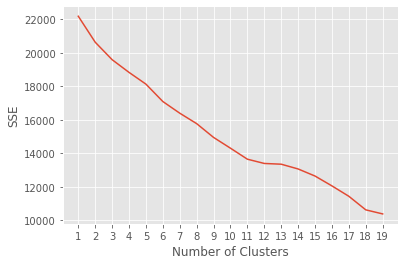

In [25]:
plt.style.use("ggplot")
plt.plot(range(1, 20), sse)
plt.xticks(range(1, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [26]:
kl = KneeLocator(
    range(1, 20), sse, curve="convex", direction="decreasing")

n_clusters = kl.elbow

In [27]:
n_clusters

11

In [28]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

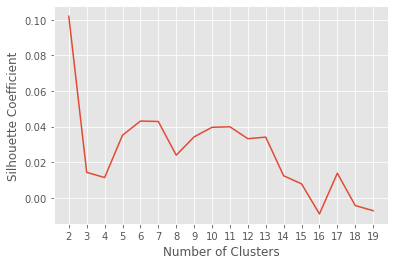

In [29]:
plt.style.use("ggplot")
plt.plot(range(2, 20), silhouette_coefficients)
plt.xticks(range(2, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [30]:
kmeans = KMeans(
    init="random",
    n_clusters=n_clusters,
    n_init=10,
    max_iter=300,
    random_state=42
)

kmeans.fit(scaled_features)

silhouette_score(scaled_features, kmeans.labels_)

0.03991201363511976

In [31]:
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline

In [32]:
#PCA

pca = PCA(n_components=2, random_state=42)
pca.fit(scaled_features)

#creating a 2-D dataframe
pcadf = pd.DataFrame(
    pca.transform(scaled_features),
    columns=["component_1", "component_2"],
)


#new columns with true labels
pcadf["predicted_cluster"] = kmeans.labels_
pcadf["true_label"] = df['Country Name']

In [33]:
pcadf

,component_1,component_2,predicted_cluster,true_label
0,-2.235176,15.787754,4,Afghanistan
1,-7.707325,-0.364705,0,Albania
2,12.582478,-0.389471,3,Angola
3,-0.808182,0.924318,4,Armenia
4,0.807322,6.958940,0,Azerbaijan
...,...,...,...,...
62,6.373564,0.501642,7,Sri Lanka
63,2.139919,2.640038,4,Thailand
64,-8.578012,0.958862,0,Turkmenistan
65,10.553590,3.613662,1,Uganda


In [34]:
silhouette_score(scaled_features, pcadf['predicted_cluster'])

0.03991201363511976

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [36]:
true_labels = le.fit_transform(pcadf['true_label'])
pcadf["true_label"] = le.inverse_transform(true_labels)
pcadf['predicted_cluster'] = pcadf['predicted_cluster'].astype('category')

In [37]:
pcadf

,component_1,component_2,predicted_cluster,true_label
0,-2.235176,15.787754,4,Afghanistan
1,-7.707325,-0.364705,0,Albania
2,12.582478,-0.389471,3,Angola
3,-0.808182,0.924318,4,Armenia
4,0.807322,6.958940,0,Azerbaijan
...,...,...,...,...
62,6.373564,0.501642,7,Sri Lanka
63,2.139919,2.640038,4,Thailand
64,-8.578012,0.958862,0,Turkmenistan
65,10.553590,3.613662,1,Uganda


In [38]:
pcadf.to_csv('/Users/vibhuverma/Desktop/CLASSWORK/BUSINESS PRACTICUM/Anti-Corruption/FINAL ML/CLUSTERING/pcadf.csv')

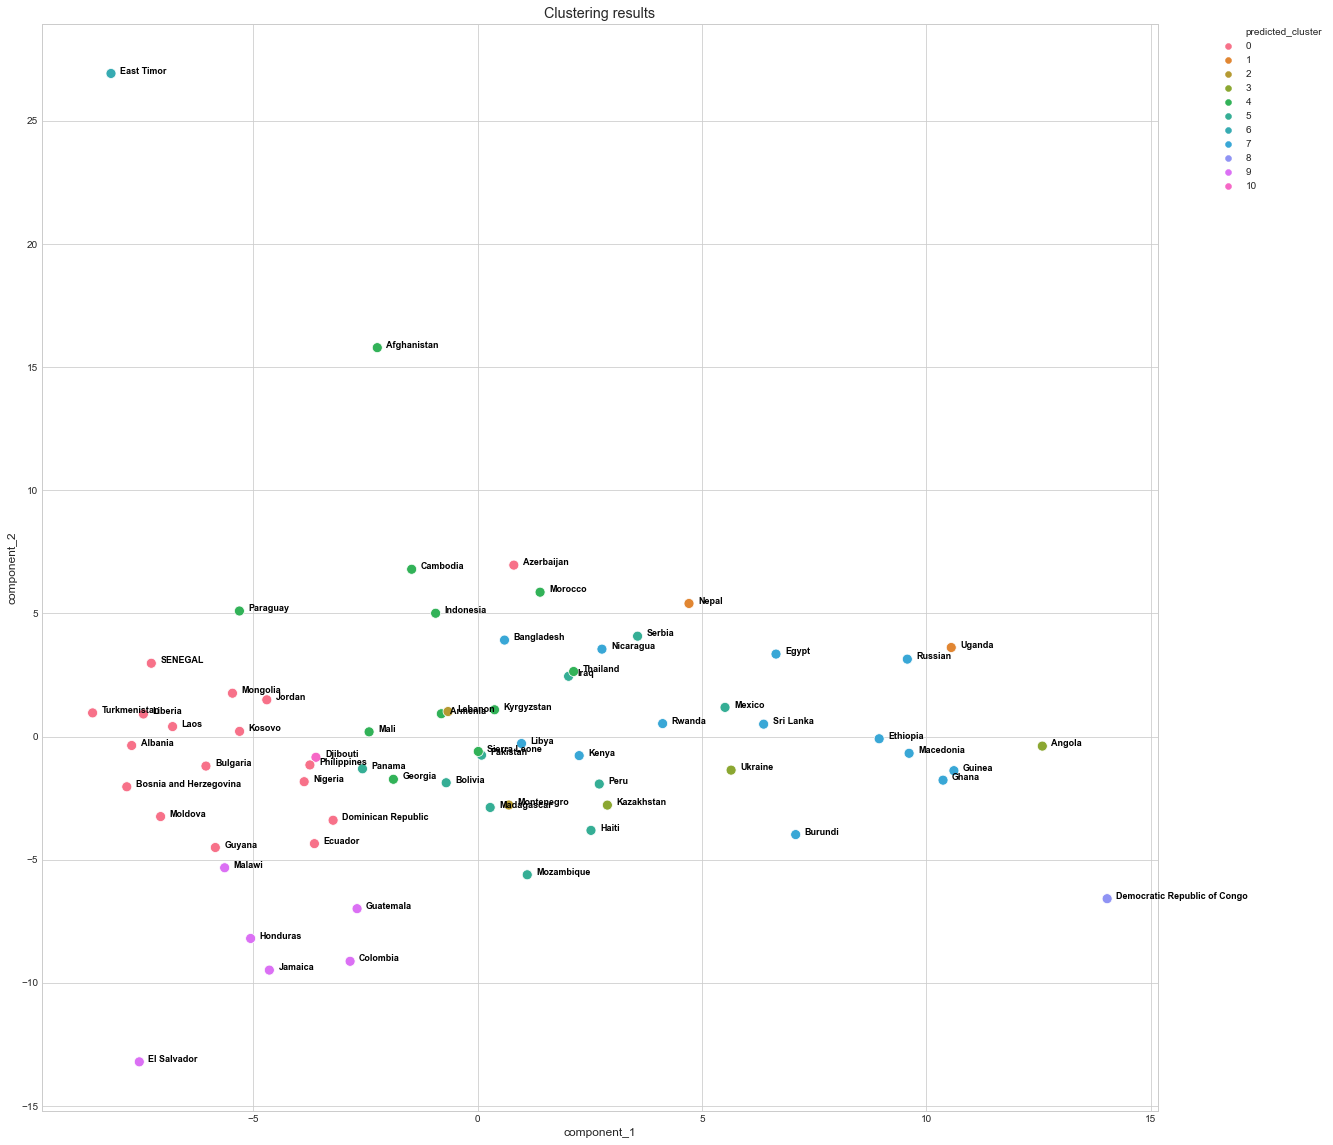

In [39]:
plt.style.use("seaborn-whitegrid")
plt.figure(figsize=(20, 20))

scat = sns.scatterplot(
    "component_1",
    "component_2",
    s=100,
    data=pcadf,
    hue="predicted_cluster")
scat.set_title(
    "Clustering results"
)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

 
# add annotations one by one with a loop
for line in range(0,pcadf.shape[0]):
     scat.text(pcadf.component_1[line]+0.2, pcadf.component_2[line], pcadf.true_label[line], horizontalalignment='left', size='medium', color='black', weight='semibold',fontsize=9)

plt.show()

In [40]:
for i in range(10):
    print(pcadf.loc[pcadf['predicted_cluster']==i])

    component_1  component_2 predicted_cluster              true_label
1     -7.707325    -0.364705                 0                 Albania
4      0.807322     6.958940                 0              Azerbaijan
7     -7.816284    -2.040315                 0  Bosnia and Herzegovina
8     -6.052652    -1.199718                 0                Bulgaria
14    -3.219393    -3.399781                 0      Dominican Republic
16    -3.635745    -4.349658                 0                 Ecuador
24    -5.843462    -4.506088                 0                  Guyana
30    -4.696737     1.490624                 0                  Jordan
33    -5.302968     0.209908                 0                  Kosovo
35    -6.795619     0.402788                 0                    Laos
37    -7.445221     0.914147                 0                 Liberia
44    -7.062584    -3.250396                 0                 Moldova
45    -5.461527     1.757838                 0                Mongolia
51    